In [1]:
import pandas as pd
from src.plot import *
import numpy as np

pd.options.display.float_format = "{:,.2f}".format

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
#Select apropriate columns

numerical = df.select_dtypes('number').columns
dates = ['issue_d','earliest_cr_line','last_pymnt_d']
categorical = df.select_dtypes('object').columns
categorical = [c for c in categorical if c not in dates]

In [4]:
#convert dates

for d in dates:
    df[d] = pd.to_datetime(df[d],format='%b-%Y')

In [5]:
# convert term into no months

df['term_months'] = df['term'].str.extract(r'(\d{2})').astype('int')
df.drop(['term'], inplace= True, axis=1)

In [6]:
# now I will check if letter in grade = letter in subgrade 

df['grade_check'] = df.apply(lambda x: x['grade'] in x['sub_grade'], axis = 1)

#all good DQ checked


In [7]:
df.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [8]:
default_columns = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']
df['target'] = df['loan_status'].apply(lambda x: 1 if x in default_columns else 0)

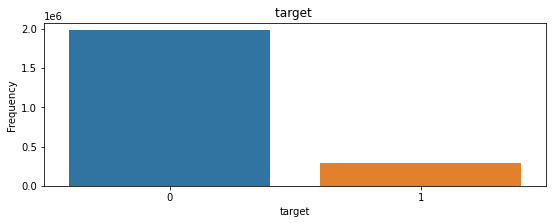

<module 'matplotlib.pyplot' from '/Users/aleksandram/.local/share/virtualenvs/PD-scoring-Yvrhi1rQ/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [9]:
plot_cnt(df, 'target')

#looks like unbalanced dataset

In [10]:
# there is 12% default rate
df['target'].mean()

0.1257787521210545

In [11]:
df[numerical]

,int_rate,installment,annual_inc,dti,recoveries
0,13.56,84.92,"55,000.00",18.24,0.00
1,18.94,777.23,"90,000.00",26.52,0.00
2,17.97,180.69,"59,280.00",10.51,0.00
3,18.94,146.51,"92,000.00",16.74,0.00
4,16.14,731.78,"57,250.00",26.35,0.00
...,...,...,...,...,...
2260663,14.08,279.72,"58,000.00",20.88,0.00
2260664,25.82,358.01,"30,000.00",19.28,0.00
2260665,11.99,332.10,"64,000.00",12.96,0.00
2260666,21.45,327.69,"60,000.00",30.82,0.00


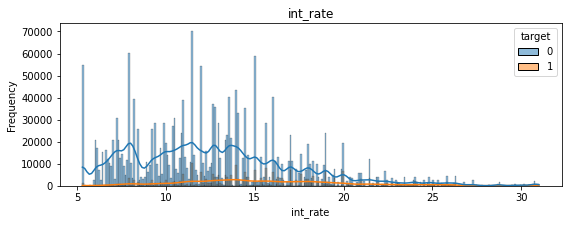

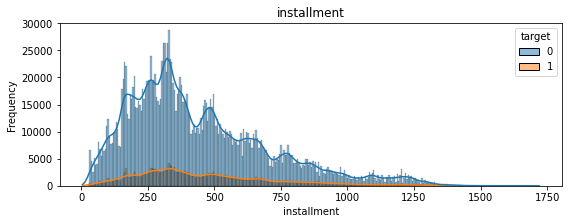

In [13]:
for c in numerical:
    plot_histogram(df,c, hue='target')

In [ ]:
for c in categorical:
    plot_cnt(df,c, hue='target')